In [31]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [32]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

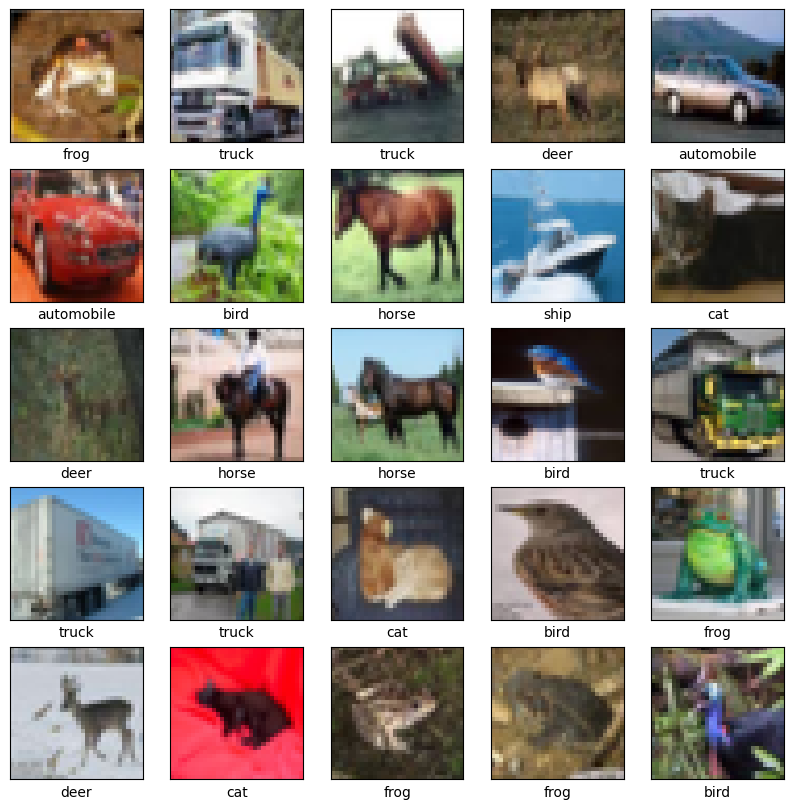

In [33]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [34]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [36]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [38]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 16s 7ms/step - loss: 1.5397 - accuracy: 0.4347 - val_loss: 1.2617 - val_accuracy: 0.5475
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1885 - accuracy: 0.5767 - val_loss: 1.0768 - val_accuracy: 0.6241
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0252 - accuracy: 0.6397 - val_loss: 1.0199 - val_accuracy: 0.6432
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9172 - accuracy: 0.6767 - val_loss: 0.9272 - val_accuracy: 0.6790
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8343 - accuracy: 0.7077 - val_loss: 0.9036 - val_accuracy: 0.6853
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7707 - accuracy: 0.7309 - val_loss: 0.8927 - val_accuracy: 0.6903
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7203 - accuracy: 0.7475 - val_loss: 0.8706 - val_accuracy

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [40]:
pred = model.predict(train_images)

1563/1563 [==============================] - 3s 2ms/step


In [41]:
pred = np.argmax(pred, axis=1)

In [42]:
type(pred)

numpy.ndarray

In [43]:
pred = np.array(pred)[pred.astype(int)]

In [44]:
type(pred)

numpy.ndarray

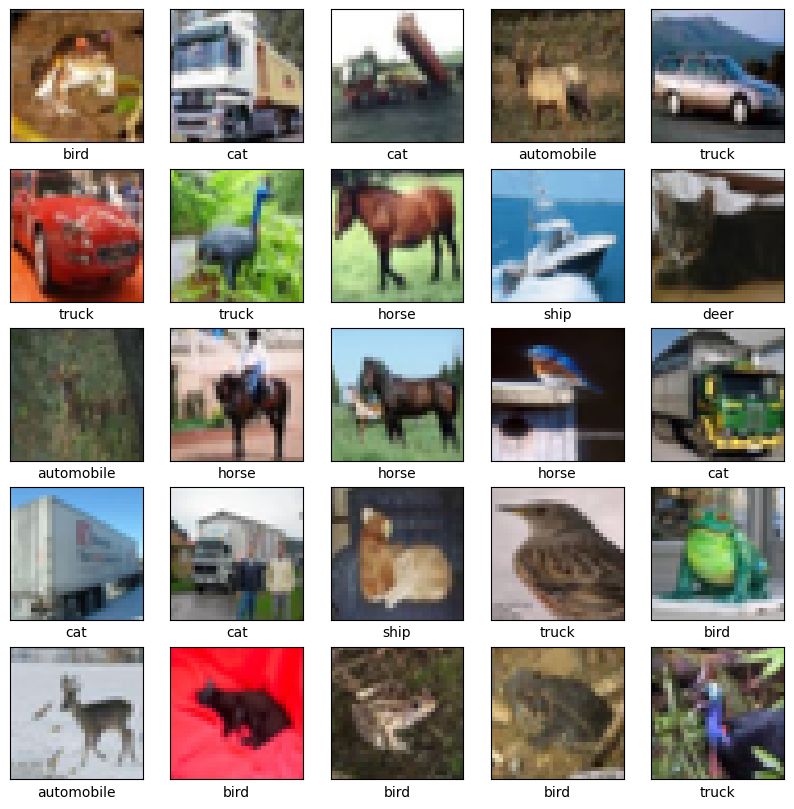

In [45]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[pred[i]])
plt.show()

In [46]:
model.save("/content/drive/MyDrive/CNN Model/cnn.h5")

In [50]:
from keras.models import load_model

In [51]:
trained_model = load_model('/content/drive/MyDrive/CNN Model/cnn.h5')

In [52]:
pred = trained_model.predict(train_images)

1563/1563 [==============================] - 3s 2ms/step
